In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv("C:\\Contents\\Kaggle\\intl_airline_passengers\\international-airline-passengers.csv")

df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


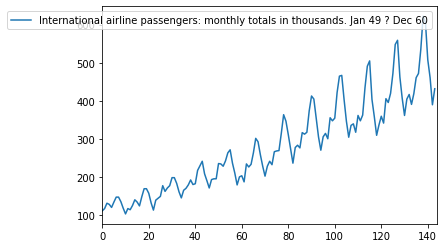

In [2]:
df.plot()
plt.show()

In [3]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [ ]:
X = df['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].values

In [13]:
X[:5]

array([112., 118., 132., 129., 121.])

In [14]:
# split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train, test = X[0:train_size], X[train_size:]
print(len(train), len(test))

97 48


In [15]:
len(X)

145

In [16]:
type(train)

numpy.ndarray

In [20]:
def create_dataset(dataset, look_back=1):
    datalen = len(dataset)
    x1, x2 = [], []
    for i in range(datalen-look_back-1):
        x1.append(dataset[i])
        x2.append(dataset[i+look_back])
    return x1, x2
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)

In [22]:
X_train[:5], y_train[:5]

([112.0, 118.0, 132.0, 129.0, 121.0], [118.0, 132.0, 129.0, 121.0, 135.0])

In [25]:
from keras.models import Sequential
from keras.layers import Dense
look_back = 1 
model = Sequential()
model.add(Dense(8, input_dim=look_back, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 58023.3279
Epoch 2/200
 - 0s - loss: 51197.6481
Epoch 3/200
 - 0s - loss: 46925.9534
Epoch 4/200
 - 0s - loss: 44098.7652
Epoch 5/200
 - 0s - loss: 40618.4003
Epoch 6/200
 - 0s - loss: 36647.1485
Epoch 7/200
 - 0s - loss: 32219.7639
Epoch 8/200
 - 0s - loss: 27579.1080
Epoch 9/200
 - 0s - loss: 23051.7233
Epoch 10/200
 - 0s - loss: 18662.6051
Epoch 11/200
 - 0s - loss: 14755.7968
Epoch 12/200
 - 0s - loss: 11273.4846
Epoch 13/200
 - 0s - loss: 8352.0105
Epoch 14/200
 - 0s - loss: 5986.5223
Epoch 15/200
 - 0s - loss: 4203.0947
Epoch 16/200
 - 0s - loss: 2885.0854
Epoch 17/200
 - 0s - loss: 1981.8182
Epoch 18/200
 - 0s - loss: 1396.0663
Epoch 19/200
 - 0s - loss: 1016.6800
Epoch 20/200
 - 0s - loss: 795.5811
Epoch 21/200
 - 0s - loss: 672.0193
Epoch 22/200
 - 0s - loss: 603.2083
Epoch 23/200
 - 0s - loss: 568.4520
Epoch 24/200
 - 0s - loss: 553.9065
Epoch 25/200
 - 0s - loss: 546.4570
Epoch 26/200
 - 0s - loss: 544.7500
Epoch 27/200
 - 0s - loss: 542.8991
Epoch 

In [26]:
model.evaluate(X_test, y_test, verbose=0)

2385.417777683424

In [28]:
import math
# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 537.28 MSE (23.18 RMSE)
Test Score: 2385.42 MSE (48.84 RMSE)
